Developed by: Fritz.Kalwa@tu-dresden.de / Thomas.Reimann@tu-dresden.de

<br>Last change: 2020 11 09

<br>Current state: funktional und nett

<br>ToDo:

- Inhalt kurz und Lernziele ergänzen (FK)
- Inhalte gliedern (Überschriften) FK
- Optimieren(?)
- Output hübscher (?)

<center>
    
### MWW11 - Hydrogeologische und Hydrochemische Methoden
### Thema: Pumpversuchsauswertung
# Pumpversuchsauswertung nach Cooper-Jacob  </center>
_Mit diesem Notebook soll Ihnen die Pumpversuchsauswertung nach dem Ansatz von Cooper-Jacob nähergebracht werden. Zum Schluss sollten Sie vor allem..._
- ...die grundlegenden Zusammenhänge zwischen den gesuchten Parametern S & T und den bekannten Parametern Q & r in Abhängigkeit von der Zeit t veranschaulichen können.
- ...die Limitierungen des Ansatzes von Cooper-Jacob benennen können.
- ...die Reaktionen an unterschiedlichen Messstellen miteinander vergleichen können.
- ...Transmissivität und Speicherkoeffizient bei gegebenen Messwerten bestimmen können (iterativ __und__ rechnerisch), unter Berücksichtigung des des kritischen Zeitpunktes $t_{min}$

In [14]:
# Notwendige Funktionen / Bibliotheken einladen
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import os
import math
from ipywidgets import *

# Die vereinfachte Brunnenfunktion
Für eine Pumpversuchsauswertung entwickelt Charles V. Theis 1935 einen Lösungsansatz. Hierbei wurde die radiale Grundwasserströmung auf ein Zentrum mit der Koordinate *0* hin analytisch berechnet. Dabei wird die Absenkung bei der Pumprate *Q* in einer Messstelle mit dem Abstand zum Zentrum *r* in Abhängigkeit von der Pumpzeit *t* bei bekannter Transmissivität *T* bestimmt:

<br>
<center>$\large s(r,t)=\frac{Q}{4\pi T}W(u) $</center>
<br>

*W(u)* ist die Brunnenfunktion:

<br>
<center>$\large W(u) = \int_{u }^{+\infty} \frac{e^{-\tilde u}}{\tilde u}d\tilde u = -0,5772 - ln(u) + u - \frac{u^2}{2*2!} + \frac{u^3}{3*3!} - \frac{u^4}{4*4!}+...$</center>
<br>

mit der dimensionslosen Variable *u*:

<br>
<center>$\large u = \frac{Sr^2}{4Tt} $</center>
<br>

wobei *S* den Speicherkoeffizienten darstellt. Die Vereinfachung von Cooper-Jacob geht darauf zurück, dass *u* mit steigender Zeit *t* immer mehr gegen 0 läuft. Deshalb kann die Brunnenfunktion *W(u)* ab einem gewissen Zeitpunkt vereinfacht werden:

<br>
<center>$\large W(u) \approx -0,5772 - ln(u)$</center>
<br>

Diese vereinfachte Funktion nimmt bei halblogarithmischer Darstellung die Form einer Geraden an, wir sprechen im Folgenden deshalb von der "logarithmischen Geraden". Die Theis'sche Funktion *W(u)*, die logarithmische Gerade und der Parameter *u* in Abängigkeit von der Zeit sind in der folgenden Grafik geplottet. Sehr deutlich wird dabei, dass die Cooper-Jacob-Vereinfachung sich erst bei ausreichend großen Zeiten der Theis'schen Brunnenfunktion annähert.

In [15]:
#PLOT u as function of t

def uplot(r, T, S):
    tmax = 100000
    u_max = 1
    r_max = 100000
    u = [u_max for x in range(r_max)]
    t = [u_max for x in range(r_max)]

    #W(u) as full computaton W and simplified computation W2
    W = [u_max for x in range(r_max)]
    W2 = [u_max for x in range(r_max)]
    for x in range(1,tmax,1):
        if x>0:
            u[x] = r**2*S/4/T/x
            t[x] = x
            W[x] = scipy.special.exp1(u[x])
            W2[x] = -0.577216-np.log(u[x])
            uu = r**2*S/4/T/0.02

    #PLOT
    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(t, u, 'green')
    ax.plot(t, W,'brown')
    ax.plot(t, W2,'blue')
    3
    #plt.yscale("log")
    plt.xscale("log")
    plt.axis([1,1E5,1E-1,1E+1])
    ax.set(xlabel='t', ylabel='u bzw W(u)',
           title='u')
    ax.grid(which="both")
    plt.legend(('u','Brunnenfunktion nach Theis','vereinfachte Brunnenfunktion'),loc=0)
    plt.axvline(x=uu, ls='--', color='red')
    plt.show()
    
# Computation
interact(uplot,
         r = widgets.FloatSlider(value=10, min=1, max=100, step=1, description='r:', disabled=False),
         T= widgets.FloatLogSlider(value=0.0001,base=10,min=-6, max=2, step=0.1,readout=True,readout_format='.2e'),
         S= widgets.FloatLogSlider(value=0.0001,base=10,min=-6, max=0, step=0.1,readout=True,readout_format='.2e'))

interactive(children=(FloatSlider(value=10.0, description='r:', min=1.0, step=1.0), FloatLogSlider(value=0.000…

<function __main__.uplot(r, T, S)>

# Der kritische Zeitpunkt und die logarithmische Gerade
Die rote, gestrichelte Linie repräsentiert den Zeitpunkt, ab dem die Abweichung der logarithmischen Geraden zu der Theis'schen Brunnenfunktion als vernachlässigbar angesehen werden kann. Dies ist dann der Fall, wenn *u* besonders klein ist ($\leq 0.02$), was mithilfe folgender Formel überprüft werden kann:

<br>
<center>$\large u \leq 0.02 = \frac{r^2 S}{4 t_{min} T} \Rightarrow  t_{min} = \frac{r^2 S}{0.08 T} $</center>
<br>


Für jeden Zeitpunkt, der größer ist als $t_{min}$ kann also bedenkenlos auf die logarithmische Gerade zurückgegriffen werden. Dies bedeutet einerseits, dass ein Pumpversuch für die Auswertung nach Cooper-Jacob möglichst lange laufen sollte und andererseits, dass alle Abweichungen vom "Normalverhalten" zu früheren Zeitpunkten ignoriert werden. Das sorgt dafür, dass mit Cooper-Jacob eine sehr gute Aussage über die Aquifereigenschaften auf großskaliger (regionaler) Ebeen getroffen werden kann. Auf der anderen Seite kann mit den hier vorgestellten Methoden keine Aussage über Aquifereigenschaften des direkten Brunnenumfeldes getroffen werden (z.B. die Anbindung Brunnen-Aquifer). \
Wenn die eben präsentierte vereinfachte Brunnenfunktion genutzt wird, vereinfacht sich auch die Berechnung der erwarteten Absenkung zu einer Funktion, die eine logarithmische Gerade darstellt:

<br>
<center>$\large s(r,t)=\frac{2.3 \, Q}{4\pi T}log\frac{2.25Tt}{r^2S} $</center>
<br>



# Der Einfluss der einzelnen Parameter
Im folgenden Graphen können Sie an vier Parametern drehen:

__r__: Der Abstand der betrachteten Messstelle zum Zentrum des Pumpbrunnens\
__T__: Die Transmissivität\
__S__: Der Speicherkoeffizient\
__Q__: Die Pumprate\
\
<em> <font color=blue>Aufgabe 1: Spielen Sie ein bisschen mit den Parametern und versuchen Sie ein Gefühl dafür zu bekommen, welchen Einfluss diese auf den Verlauf der logarithmischen Geraden, den Verlauf von *u* und die Lage von $t_{min}$ haben. Notieren Sie, auf welche Art und Weise die einzelnen Parameter die Funktionen beeinflussen und überlegen Sie, was das für Konsequenzen in der Praxis haben könnte.</font> </em>

In [16]:
#PLOT s and u as function of t

def splot(r, T, S, Q):
    tmax = 1000000
    s_max = 1
    r_max = 1000000
    s = [s_max for x in range(r_max)]
    u = [s_max for x in range(r_max)]
    t = [s_max for x in range(r_max)]
    

    for x in range(1,tmax,1):
        if x>0:
            s[x] = (2.3*Q)/(4*3.1416*T)*math.log((2.25*T*x)/(r**2*S))
            u[x] = r**2*S/4/T/x
            t[x] = x
            uu = r**2*S/4/T/0.02

    #PLOT
    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(t, u, 'g-')
    ax.plot(t, s, 'b-')
    3
    #plt.yscale("log")
    plt.xscale("log")
    plt.axis([1,1E5,1E-1,1E+1])
    ax.set(xlabel='t [s]', ylabel='Absenkung s [m] bzw. u [-]',
           title='Absenkung s und u')
    ax.grid(which="both")
    plt.legend(('u','Cooper-Jacob s'),loc=1)
    plt.axvline(x=uu, ls='--', color='red')
    plt.show()
    
# Computation

interact(splot,
         r = widgets.FloatSlider(value=10, min=1, max=100, step=1, description='r [m]:', disabled=False),
         Q = widgets.FloatLogSlider(value=0.0001, base=10, min=-4, max=0-2, step=0.001, description='Q [m³/s]:', readout_format='.2e'),
         T = widgets.FloatLogSlider(value=0.0001,base=10,min=-6, max=2, step=0.1,readout=True,description='T [m²/s]:',readout_format='.1e'),
         S = widgets.FloatLogSlider(value=0.0001,base=10,min=-6, max=0, step=0.1,readout=True,description='S [ - ]:',readout_format='.1e'))

interactive(children=(FloatSlider(value=10.0, description='r [m]:', min=1.0, step=1.0), FloatLogSlider(value=0…

<function __main__.splot(r, T, S, Q)>

# Die Bestimmung von Transmissivität und Speicherkoeffizient
Im oben dargestellten Graphen sind die Parameter *T* und *S* bekannt (weil wir sie selber festgelegt haben). Üblicherweise führen wir einen Pumpversuch aber ja durch, um genau diese Parameter zu bestimmen. Bekannt ist nur der Abstand der Messstelle zum Pumpbrunnen und die Fließrate (so sie denn ordentlich gemessen wird).
Nehmen wir z.B. die folgenden Daten, die dem Lehrbuch von Schwartz und Zhang entnommen wurden:

In [17]:
#DATA FROM SCHWARTZ & ZHANG (2003)
#Q = 500 m3/d, r = 300 m
m_time = [1,1.27,1.61,2.04,2.59,3.29,4.18,5.3,6.72,8.53,10.83,13.74,17.43,22.12,28.07,35.62,45.2,57.36,72.79,92.37,117.21,148.74,188.74,239.5,303.92,385.66,489.39,621.02,788.05,1000] # time in minutes
m_ddown = [0.03,0.05,0.09,0.15,0.22,0.31,0.41,0.53,0.66,0.8,0.95,1.11,1.27,1.44,1.61,1.79,1.97,2.15,2.33,2.52,2.7,2.89,3.07,3.26,3.45,3.64,3.83,4.02,4.21,4.39]   # drawdown in meters
m_t = np.array(m_time)*60

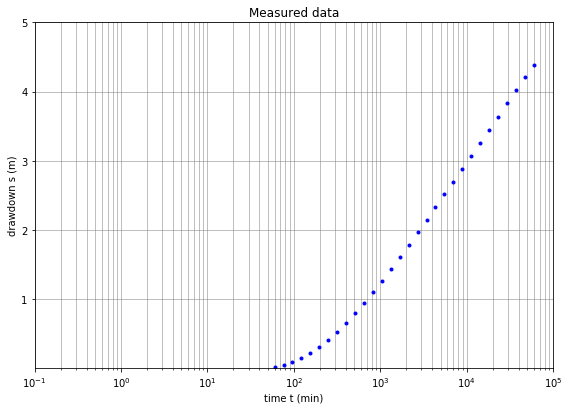

In [18]:
#Plot Data
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)  # adjust plot area
ax.plot(m_t, m_ddown,'bo', markersize=3)
plt.yscale("linear")
plt.xscale("log")
plt.axis([0.1,1E5,1E-2,5E+0])
    
ax.set(xlabel='time t (min)', ylabel='drawdown s (m)',
       title='Measured data')
ax.grid(which="both", color='grey',linewidth=0.5)
plt.show()

Die Fließrate beträgt *500 m³/Tag* und die Messstelle befindet sich in *300 m* Entfernung zum Pumpbrunnen. Um die Vereinfachung der Brunnenfunktion nach Cooper-Jacob auf diese Messwerte anzuwenden, plotten wir beides zusammen:

In [19]:
#Plot Function
def splot(r, T, S, Q):
    tmax = 1000000
    s_max = 1
    r_max = 1000000
    s = [s_max for x in range(r_max)]
    t = [s_max for x in range(r_max)]
    
    for x in range(1,tmax,1):
        if x>0:
            s[x] = (2.3*Q)/(4*3.1416*T)*math.log((2.25*T*x)/(r**2*S))
            t[x] = x
            uu = r**2*S/4/T/0.02

    #PLOT
    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(t, s, 'green')
    ax.plot(m_t, m_ddown,'bo', markersize=3)
    3
    #plt.yscale("log")
    plt.xscale("log")
    plt.axis([10,1E5,1E-1,5E+0])
    ax.set(xlabel='t [s]', ylabel='Absenkung [m]',
       title='Auswertung nach Cooper-Jacob')
    ax.grid(which="both", color='grey',linewidth=0.5)
    plt.legend(('Cooper-Jacob','Messwerte'),loc=0)
    plt.axvline(x=uu, ls='--', color='red')
    plt.show()
# Computation

interact(splot,
         r = widgets.FloatSlider(value=10, min=10, max=1000, step=10, description='r [m]:', disabled=False),
         Q = widgets.FloatLogSlider(value=0.0001, base=10, min=-4, max=0-2, step=0.001, description='Q [m³/s]:', readout_format='.2e'),
         T = widgets.FloatLogSlider(value=0.0001,base=10,min=-6, max=2, step=0.1,readout=True,description='T [m²/s]:',readout_format='.1e'),
         S = widgets.FloatLogSlider(value=0.0001,base=10,min=-6, max=0, step=0.1,readout=True,description='S [ - ]:',readout_format='.1e'))

interactive(children=(FloatSlider(value=10.0, description='r [m]:', max=1000.0, min=10.0, step=10.0), FloatLog…

<function __main__.splot(r, T, S, Q)>

__Iteratives Vorgehen__ \
<font color=blue> <em>Aufgabe 2: Versuchen Sie, durch richtige Abschätzung der Parameter die logarithmische Gerade möglichst gut an die Messwerte anzupassen.</font> </em> \
Nach Einstellung der richtigen Pumprate und des Abstandes zur Messstelle können wir durch fröhliches Rumprobieren (wissenschaftlich gesprochen: iterativ) versuchen, die Parameter *T* und *S* zu bestimmen.
Denken Sie daran: Für die Anpassung der Geraden an die Messwerte dürfen Sie nur die Werte verwenden, die sich __rechts__ der roten Linie befindet, die den kritischen Zeitpunkt darstellt, ab dem die vereinfachte Brunnenfunktion gilt. \



__"Klassische" Berechnung nach Cooper-Jacob__ \
Ein solches iteratives Verfahren ist grundsätzlich zulässig. Es gibt aber auch einen anderen Weg, der oft schneller und auch anwendbar ist, wenn man gerade kein eigens dafür programmiertes Worksheet zur Hand hat und/oder die Werte nur auf Papier vorliegen (beispielsweise in einer Klausur).
So lässt sich die logarithmische Gerade der angepassten Brunnenfunktion auch von Hand durch die vorab ausgewählten Messwerte zeichnen.  \
Der Grund, warum wir nun aus unserer vereinfachten Brunnenfunktion nicht sofort Transmissivität und Speicherkoeffizient ablesen können, ist, dass wir __zwei__ unbekannte Parameter (*T* und *S*) in __einer__ Gleichung haben:

<br>
<center>$\large s(r,t)=\frac{Q}{4\pi T}log\frac{2.25Tt}{r^2S} $</center>
<br>

__Hintergrund: Subtraktion zweier Absenkungen__ \
Das Problem lässt sich durch einen kleinen Trick umgehen, denn wenn die Absenkung an zwei unterschiedlichen Zeitpunkten bekannt ist, kann die Gleichung durch Subtraktion auf eine Unbekannte (*T*) reduziert werden:

<br>
<center>$\large s_1=\frac{Q}{4\pi T}log\frac{2.25Tt_1}{r^2S}     \hspace{35pt}         s_2=\frac{Q}{4\pi T}log\frac{2.25Tt_2}{r^2S} $</center>
<br>

<br>
<center>$\large s_2-s_1= \Delta s=\frac{2.3 \, Q}{4\pi T} log\frac{t_2}{t_1} $</center>
<br>

__Bestimmung der Transmissivität__\
Jetzt suchen wir uns zwei beliebige Zeitpunkte auf der logarithmischen Geraden und bestimmen die Differenz in der Abweichung $\Delta s $. Im Idealfall liegen diese genau eine Größenordnung auseinander (z.B. die Zeitpunkte 10² und 10³ Sekunden), denn dadurch wird die Gleichung weiter vereinfacht, da: $ log\frac{1000}{100}=1 $ . Die Transmissivität lässt sich nun ganz einfach mit folgender Formel bestimmen:

<br>
<center>$\large T = \frac{2.3 Q}{4 \pi \Delta s} $</center>
<br>

__Bestimmung des Speicherkoeffizienten__\
Um den Speicherkoeffizienten zu bestimmen, muss die vereinfachte Brunnengleichung erneut angepasst werden. Da *T* inzwischen bekannt ist, lässt sich *S* sehr einfach bestimmen, indem der Schnittpunkt der Geraden mit der x-Achse abgelesen wird ($t_0$). Dieser befindet sich sich zwar meistens auf der linken Seite des kritischen *t*'s, was aber in diesem Fall kein Problem darstellt. \
Wenn also der Schnittpunkt mit der x-Achse bekannt ist, ergibt sich:

<br>
<center>$\large s = 0 = \frac{Q}{4\pi T}log\frac{2.25Tt_0}{r^2S} $</center>
<br>

Da der Faktor $\frac{Q}{4\pi T}$ nur aus bekannten Konstanten aufgebaut ist, kann er nicht zu *0* werden. Deshalb kann er vernachlässigt werden und es ergibt sich:

<br>
<center>$\large log\frac{2.25Tt_0}{r^2S} = 0 \qquad \Rightarrow \qquad \frac{2.25Tt_0}{r^2S} = 1 $</center>
<br>

Nach Umstellung ergibt sich eine Formel, durch die sich nach Ablesen des Zeitpunktes *t_0* (dem Schnittpunkt der Geraden mit der x-Achse) einfach die Transmissivität errechnen lässt:

<br>
<center>$\large S = \frac{2.25Tt_0}{r^2} $</center>
<br>

__Überprüfung des kritischen Zeipunktes $t_{min}$__\
Schlussendlich muss bei jeder händischen Bestimmung von *S* und *T* überprüft werden, ob die für die Bestimmung der logarithmischen Geraden verwendeten Messwerte allesamt oberhalb des kritischen Zeitpunktes $t_min$ liegen, bei dem gilt: $u \leq 0.02 $. \
Dies erfolgt durch einfaches Einsetzen der bestimmten Werte in die schon bekannte Gleichung:\
\
<br>
<center>$\large t_{min} = \frac{r^2 S}{0.08 T} $</center>
<br>

Falls bei der händischen Festlegung der logarithmischen Geraden Messwerte berücksichtigt wurden, die kleiner als das errechnete $t_{min}$ sind, geht das ganze Spiel nochmal von vorne los... Das ist insbesondere dann von Belang, wenn die Bearbeitung mit Tabellenkalkulationsprogrammen (Excel, LibreOffice Calc, etc.) gearbeitet wird.

<font color=blue> <em>Aufgabe 3: Rechnen Sie mithilfe der oben dargestellten Formeln und manuell abgelesenen Werten die Transmissivität, den Speicherkoeffizienten und den kritischen Zeitpunkt aus. Sind Ihre Ergebnisse identisch mit denen, die Sie oben eingestellt haben?</font> </em>